# Configuring and Running a Simple Neural Network: Binary Classification
The following example illustrates the most important points of configuring, running, and assessing the performance of a NN.  

This example uses binary classification, which simply means that the network will categorize the output layer into either diabetic or not diabetic.  Other archietctures will neural networks are possible, including multicategorical classification and numeric estimation.

## Read in the Data

In [3]:
import pandas as pd
df = pd.read_csv('pima_cleaned-1.csv')

In [4]:
df.head()

,xpregnant,glucose,diastolic,tricep,insulin,bmi,pedigree,age,diabetes
0,2,108,62,32,56,25.2,0.128,21,0
1,0,137,68,14,148,24.8,0.143,21,0
2,1,89,66,23,94,28.1,0.167,21,0
3,0,139,62,17,210,22.1,0.207,21,0
4,4,99,76,15,51,23.2,0.223,21,0


In [5]:
df.shape

(392, 9)

In [6]:
df.columns

Index(['xpregnant', 'glucose', 'diastolic', 'tricep', 'insulin', 'bmi',
       'pedigree', 'age', 'diabetes'],
      dtype='object')

## Check for missing values
This step is very important, since a NN my fail if the data contain missing values.

In [7]:
df.isnull().sum()

xpregnant    0
glucose      0
diastolic    0
tricep       0
insulin      0
bmi          0
pedigree     0
age          0
diabetes     0
dtype: int64

Since there are no missing values, we can move forward.

## Divide the Data into X and y DataFrames

In [22]:
X = df[['xpregnant', 'bmi','age']]
y = df['diabetes']

## Split the dataset into the Training set and Test set
Just like other machine learn techniques, neural networks are susceptible to over fitting.  To avoid overfitting our model, we will divide the data set into a train and test.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, \
        random_state = 0)

## Scale the data
Any feature data that are continuous (e.g., integers or reals) must be scaled before using them in an ANN.  The StandardScaler transforms the data so that the mean is 0 and the standard deviation is 1.

Note that binaries do NOT need to be scaled!

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
X_train.shape[1] #  <--Run this, which returns the second dimension

# Remember, shape returns (rows,columns). This returns the number of columns, which
# we will need in a minute

3

## Import Keras Libraries

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'keras'

You may get a pink informational message that informs you that Keras is using Tensorflow.  That is okay: Keras is easier to use than Tensorflow for building neural networks, but it relies on Tensorflow for some of its backend processing.

## Declare Model Architecture

In [23]:
model = Sequential() #1

# NOTE: Use the number from the above shape command in the following statement
model.add(Dense(8, activation='relu', input_dim=3, name='first_hidden')) # input and hidden layer #2
# NOTE: the following line is purposely commented out
# model.add(Dense(8, activation = 'relu', name='second_hidden'))
model.add(Dense(1, activation = 'sigmoid', name='output')) #3
model.summary() #4

NameError: name 'Sequential' is not defined

## What the Architecture Means
Keras uses a class called Sequential to build models.  The Sequential class is straightforward, since you build the model in a sequential manner.  In the following code, I declare a Sequential object, add an input layer with 8 nodes, as well as the first hidden layer (12 nodes); add another hidden layer with 8 nodes, and add a final output layer with one node.  Let's review each above line in turn:
* Line 1: This creates the sequential object, which we call model
* Line 2: This line does a lot.  Since all neural networks have at least one hidden layer, Keras allows you to add the input layer as well as the first hidden layer in one statement.  In this case we have 8 input variables (which agrees with the number of columns in X).  We use relu (rectified linear unit) as the activation function, which is among the most common.  
* Line 3: We add the output layer, which is the result of our network.  Since the output is a single probability value that represent the P(diabetes), we only need one node.  Because the output is a probability, the appropriate activation function is sigmoid.  That is critical, since sigmoid tranforms the inputed value into a value between 0 and 1 (which works well for probability!).
* Line 4: the summary method produces a report that communicates the architecture of our network.  Note that for some reason the input layer is not included, but--because we used the name argument, the hidden and output layers are easily identified.

Because we used Dense (which we will for all model construction, each layer of the model is fully connected automatically to the next layer.  The above architecture therefore looks like the image below, with the blue input layer representing our data, the red hidden layer storing the networks knowledge, and the green output layer holding the predictions:

<img src="ANN.png">

You might notice that we have not yet associated the data with the above architecture.  That is the norm with Keras.  First you construct the architecture, independent of the data.  Once the architecture is constructed, you will compile the model and set the hyperparameters.  

The next line compiles the model, and also sets some important hyperparameters. Along with the sigmoid activation function in the output layer, the appropriate loss function is binary crossentropy, because there are two possible outcomes (diabetic/not diabetic).  Keras offers a variety of optimizers, and adam is very common. We will track accuracy as a metric, which we will use later in this notebook.

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The final step is to fit the model using the data.  The _hyperparameters_ must also must supplied: they are the batch size and the number of epochs.  The verbose setting just tells keras how much information to provide when it is fitting the model.
* The data X and y were set up above.  The y data needs to be diabetes, since that holds a 0 or 1 value, representing whether or not that person is a diabetic.
* epochs.  An epoch represents a complete pass through the entire data set, which contains 392 people. If we set epochs = 150, that means the netowrk will pass through all data 150 times.
* batch size.  When running the model fit, Keras will shuffle the data into batches, and then run the data forward through the network. The amount of error is calculated, and the weights on the hidden layer nodes are updated according to an algorithm called backward propagation. With a batch size of 10, there will be 392/10 batches per epoch.
* Setting verbose = 0 turns off all feedback.  To see Keras iterate through the epochs, change verbose = 1 or even verbose = 2.

## Train the Model Using Training Data Set

In [29]:
model.fit(X_train, y_train, batch_size = 10, epochs = 150, verbose=0)

## Examine the Model Accuracy and Confusion Matrix for Training Data

In [30]:
loss, accuracy = model.evaluate(X_train,y_train)
print("The model loss is {:.2f} and its accuracy is {:.2f}.".format(loss, accuracy))

313/313 [==============================] - 0s 150us/step
The model loss is 0.48 and its accuracy is 0.76.


In [31]:
pred_classes = model.predict_classes(X_train)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,pred_classes)

array([[188,  26],
       [ 48,  51]])

Recall that the upper-left to lower right diagonal represents the correct classifications.

## Test Model Generalizability by Examining Its Accuracy Relative to the Training Data
One way to examine model overfit is to give the model some new data and see how it performs.  As we have discussed, if the model is generalizable, its performance with the test data should be comparable to its performance with the training data.

In [33]:
loss, accuracy = model.evaluate(X_test,y_test)
print("The model loss is {:.2f} and its accuracy is {:.2f}.".format(loss, accuracy))

79/79 [==============================] - 0s 25us/step
The model loss is 0.58 and its accuracy is 0.67.


When it experiences the testing data, the model fit degrades considerably.  This drop indicates some degree of model overfit. We apparently have run too many epochs, which means the model has seen the data too many times.  It is starting to fit to the data's error, in addition to its information.  Reducing the number of epochs might improve the generalizability of the model.

In [34]:
pred_classes = model.predict_classes(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_classes)

array([[41,  7],
       [19, 12]])

How does our model do:
* For people without diabetes (row 1), the probability that the model is correct: 
* For people with diabetes (row 2), the probability that the model is correct: 

* If the model predicts the person does not have diabetes (column 1), the chance that they do not: 
* If the model predicts the person has diabetes (column 2), the chance that they do: 

This is perhaps the more critical part of the model, since it predicts someone's physical state, given a test result.  If the test says the person is diabetic, the chance is very high that they actually are.  If the test says they are not, however, there still is about a 1 in 3 chance that they still are (false negative).

### Classification Report
We did a classification report back in decision trees, and you can do it with NN as well.  Take a look at the precision and recall scores of our model:

In [36]:
from sklearn.metrics import classification_report
target_names=['non-diabetic','diabetic'] # b/c 0=healthy, 1=diabetic
print(classification_report(y_test, pred_classes, target_names=target_names))

              precision    recall  f1-score   support

non-diabetic       0.68      0.85      0.76        48
    diabetic       0.63      0.39      0.48        31

   micro avg       0.67      0.67      0.67        79
   macro avg       0.66      0.62      0.62        79
weighted avg       0.66      0.67      0.65        79



When interpreting the above:
* Precision column: start with the words "When the model predicts..."
* Recall column: start with the words "When the person is actually..."

For a precision example, when the model predicts that someone is healthy, the person is actually non-diabetic 68\% of the time (precision). When the person is actually healthy (recall), the model correctly predicts 88\% of the time.

You might notice how low the recall is for diabetics--that is, when we know the person is actually diabetic, the model is correct only 35\% of the time.  

## Predict New Cases
Recall that the features in our input layer consist of the number of times a woman has been pregnant (xpregnant), her bmi, and her age.  So let's have our model generate a probability and a prediction (yes/no to diabetes), based on the following scenario:
* Person 1 (Fit)
  * xpregnant: 0
  * bmi: 23
  * age: 21
* Person 2 (Overweight but Young)
  * xpregnant: 0
  * bmi: 30
  * age: 35
* Person 3 (Young and Pregnant for first time)
  * xpregnant: 1
  * bmi: 27
  * age: 24
* Person 2 (Overweight and Older)
  * xpregnant: 0
  * bmi: 32
  * age: 60
  
Since the value in Person 1 represent a best case scenario, we expect the result to be low. The other scenarios will help us understand how the risk factors affect the resulting probabilities.

Because the data in the input layer were standardized, we cannot just input the data directly into our model.  We have to standardize them first.

In [37]:
new_data = sc.transform([
    [0,23,21],
    [0,30,35],
    [1,27,24],
    [0,32,60]
])

In [38]:
prob_prediction = model.predict_proba(new_data)
prob_prediction

array([[0.03555224],
       [0.5298317 ],
       [0.09055339],
       [0.68709373]], dtype=float32)

The outcomes:
* Person 1: 1.7\% chance that the person has diabetes.  
* Person 2: 49.7\% chance that the person has diabetes.
* Person 3: 6.9\% chance that the person has diabetes.
* Person 4: 64.7\% chance that the person has diabetes.

The following analysis generates the result, where 0=no diabetes and 1=diabetes:

In [52]:
class_prediction = model.predict_classes(new_data)
class_prediction

array([[0],
       [0],
       [0],
       [1]])

The above result will always be consistent with the probability--that is, if the probability is less than 0.50, the class will be 0. Probabilities > 0.50 will be 1.

In [47]:
df['predictions'] = model.predict_proba(X_scaled)

In [48]:
df.head()

,xpregnant,glucose,diastolic,tricep,insulin,bmi,pedigree,age,diabetes,predictions
0,2,108,62,32,56,25.2,0.128,21,0,0.024312
1,0,137,68,14,148,24.8,0.143,21,0,0.023444
2,1,89,66,23,94,28.1,0.167,21,0,0.041081
3,0,139,62,17,210,22.1,0.207,21,0,0.014520
4,4,99,76,15,51,23.2,0.223,21,0,0.016482


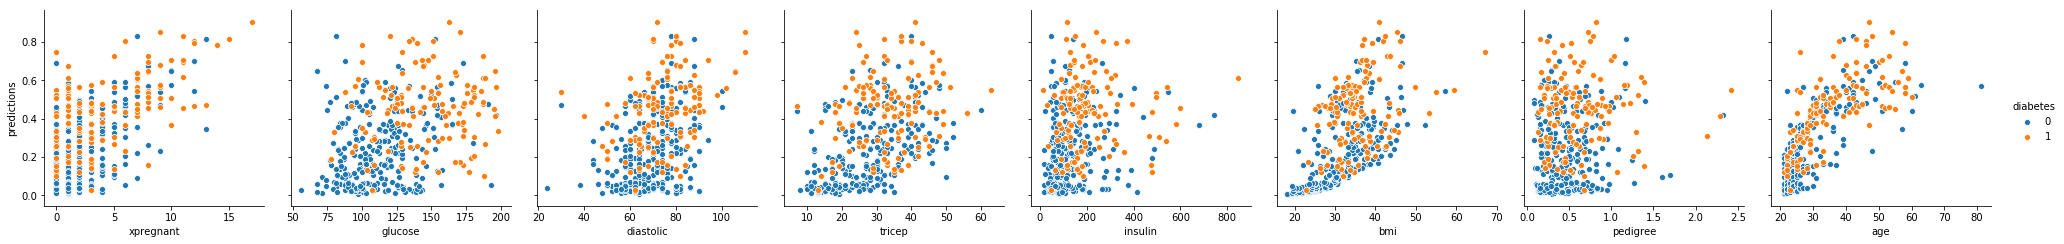

In [49]:
sns.pairplot(df, x_vars=['xpregnant', 'glucose', 'diastolic', 'tricep', 'insulin', 'bmi',
       'pedigree', 'age'], y_vars=['predictions'], hue='diabetes',height=3.5)

## Exercise
* Improve model generalizability
  * Gradually reduce the number of epochs in the model, running the full model each time.  
  * See if you can reach a point where the accuracy levels stabilize for both the training and the test data set.
Go back to the model architecture cell and:
* uncomment the line that created a second hidden layer
* Rerun the model, and note how the accuracy changes.  

In [8]:
X = df[['pedigree', 'bmi','age']]
y = df['diabetes']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, \
        random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape[1]

3

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'keras'

In [13]:
model = Sequential() #1

# NOTE: Use the number from the above shape command in the following statement
model.add(Dense(8, activation='relu', input_dim=3, name='first_hidden')) # input and hidden layer #2
# NOTE: the following line is purposely commented out
# model.add(Dense(8, activation = 'relu', name='second_hidden'))
model.add(Dense(1, activation = 'sigmoid', name='output')) #3
model.summary() #4

NameError: name 'Sequential' is not defined